<a href="https://colab.research.google.com/github/BethanyJep/Python-REFRESHER/blob/master/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Predicting Amount Spent

From the model predictions and correlations,  What features can we improve to increase the amount spent by customers per year?.
    
    
    i.e increasing the average sessions, reducing time on app will increase the amount spent per year.  Give your findings.


In [ ]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import numpy as np

from sklearn.metrics import r2_score
from sklearn import model_selection

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pandas.read_csv("http://modcom.co.ke/bigdatasept/datasets/Customers.csv")
df

,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...
495,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [ ]:
# label encoding - avatars
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Avatar'] = le.fit_transform(df['Avatar'])
df.head()

,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",132,34.497268,12.655651,39.577668,4.082621,587.951054
1,"4547 Archer Common\nDiazchester, CA 06566-8576",25,31.926272,11.109461,37.268959,2.664034,392.204933
2,"24645 Valerie Unions Suite 582\nCobbborough, D...",6,33.000915,11.330278,37.110597,4.104543,487.547505
3,"1414 David Throughway\nPort Jason, OH 22070-1220",114,34.305557,13.717514,36.721283,3.120179,581.852344
4,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",80,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Address               500 non-null    object 
 1   Avatar                500 non-null    int64  
 2   Avg. Session Length   500 non-null    float64
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.5+ KB


In [ ]:
df.describe()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,68.736000,33.053194,12.052488,37.060445,3.533462,499.314038
std,41.025217,0.992563,0.994216,1.010489,0.999278,79.314782
min,0.000000,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.750000,32.341822,11.388153,36.349257,2.930450,445.038277
50%,69.500000,33.082008,11.983231,37.069367,3.533975,498.887875
75%,106.000000,33.711985,12.753850,37.716432,4.126502,549.313828
max,137.000000,36.139662,15.126994,40.005182,6.922689,765.518462


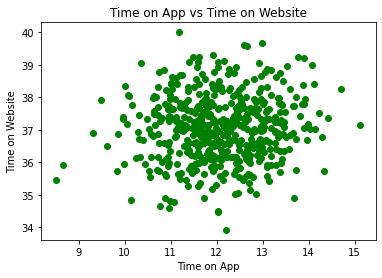

In [ ]:
x, y = plt.subplots()
y.scatter(df['Time on App'],  df['Time on Website'], color='green')
y.set_title('Time on App vs Time on Website')
y.set_xlabel('Time on App')
y.set_ylabel('Time on Website')
plt.show()

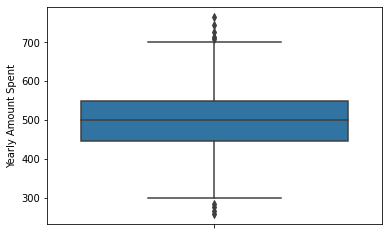

In [ ]:
sns.boxplot(y = 'Yearly Amount Spent', data=df)
plt.show()

# Z - Score, standard deviation,
# How to remove the outliers

In [ ]:
# Convert dataframe to array
array = df.values
X  = array[:, 2:5]
Y =  array[:, 6]


X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = 0.30, random_state=42)



# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('SVR', SVR()))
models.append(('RF', RandomForestRegressor()))
# evaluate each model in turn

for name, model in models:
      kfold = model_selection.KFold(n_splits=15, random_state=52, shuffle=True)
      cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='r2')
      print(name, cv_results.mean())


model = LinearRegression()
model.fit(X_train,Y_train)

# Step 4  - we hide y_test that contains the expected answers
predictions = model.predict(X_test)
# print('Predicted ', predictions)
# print('Expected', Y_test)


LR 0.2723427260170836
KNN 0.11364135830887104
DT -0.5172951725206846
GBR 0.1332773410911079
SVR -0.06927158611770473
RF 0.08504261316694466


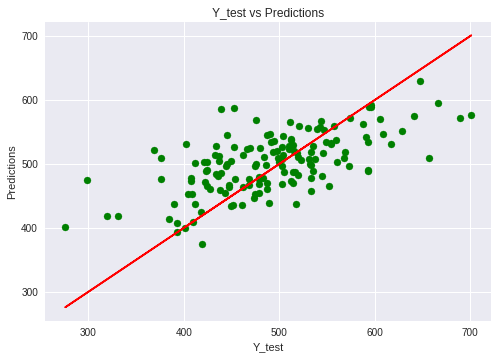

Model scored R2 0.3870568403724586
SLope  [27.99954032 41.68421849 -1.85575238]
Intercept  -856.895811208813


In [ ]:
plt.style.use('seaborn')
x, y = plt.subplots()
y.scatter(Y_test, predictions, color='green')
y.plot(Y_test, Y_test, color='red')
y.set_title('Y_test vs Predictions')
y.set_xlabel('Y_test')
y.set_ylabel('Predictions')
plt.show()


print('Model scored R2', r2_score(Y_test, predictions))
# Print more 
print('SLope ', model.coef_)
print('Intercept ', model.intercept_)


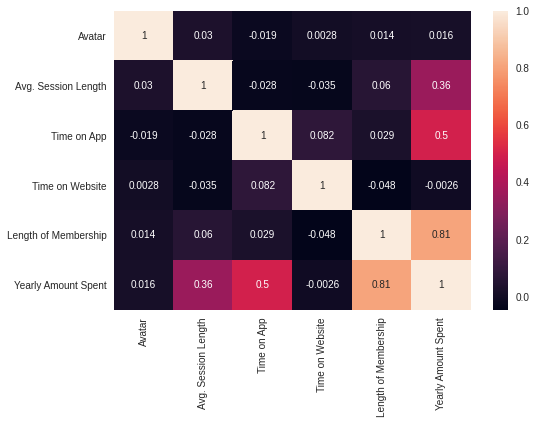

In [ ]:
sns.heatmap(df.corr(), annot=True)

increasing the average sessions, increasing time on app decreasing time on website and increasing the length of membership will increase the amount spent per year.